In [1]:
%run functions.ipynb

## Band Limited White Noise

### (1) Damping

In [5]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,zeta[i],4,1,0;
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

### (2) Overlap

In [ ]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,0.05,4,1,overlap[i];
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

### (3) SDOF 고유진동수가 PSD 주파수 범위 벗어난 경우

In [ ]:
bandwidth = np.linspace(1,4,4)/5;
location = np.linspace(0,5,6)/5;
for i in range(len(bandwidth)):
    for j in range(len(location)):
        fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,bandwidth[i],location[j],0.05,4,1,0;
        blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

### (4) Band Split PSD 증폭

In [ ]:
amp_fact = np.linspace(1,np.sqrt(2),10);
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,0.05,4,amp_fact[i],0;
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

## Unimodal

### (1) Damping

In [ ]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,zeta[i],4,1,0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

### (2) Overlap

In [ ]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,0.05,4,1,overlap[i];
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

### (3) SDOF 고유진동수가 PSD 주파수 범위 벗어난 경우

In [ ]:
bandwidth = np.linspace(1,4,4)/5;
location = np.linspace(0,5,6)/5;
for i in range(len(bandwidth)):
    for j in range(len(location)):
        fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,bandwidth[i],location[j],500,0.1,0.05,4,1,0;
        df = (fmax-fmin)*bwp; f1 = fmin + loc*(fmax-fmin-df); f2 = f1+df; fn1 = (f1+f2)/2;
        unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

### (4) Band Split PSD 증폭

In [ ]:
amp_fact = np.linspace(1,np.sqrt(2),10);
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,0.05,4,amp_fact[i],0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

### (5) 입력 PSD Damping(irregularity) 영향

In [ ]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,zeta[i],0.05,4,1,0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

## Bimodal

### (1) Damping

In [ ]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,zeta[i],4,1,0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### (2) Overlap

In [ ]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,0.05,4,1,overlap[i];
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### (3) SDOF 고유진동수가 PSD 주파수 범위 벗어난 경우

In [ ]:
bandwidth = np.linspace(1,4,4)/5;
location = np.linspace(0,5,6)/5;
for i in range(len(bandwidth)):
    for j in range(len(location)):
        fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,bandwidth[i],location[j],250,0.1,750,0.1,1,0.05,4,1,0;
        df = (fmax-fmin)*bwp; f1 = fmin + loc*(fmax-fmin-df); f2 = f1+df; fn1 = (f1+f2)/3; fn2 = 2*(f1+f2)/3;
        bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### (4) Band Split PSD 증폭

In [ ]:
amp_fact = np.linspace(1,np.sqrt(2),10);
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,0.05,4,amp_fact[i],0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### (5) 입력 PSD Damping(irregularity) 영향

In [ ]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,zeta[i],750,zeta[i],1,0.05,4,1,0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### 저주파 크기 떨림

In [2]:
def blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl):
    # Generate Input PSD
    freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000); 
    for i in range(5000):
        psd_spec[i]= blwn(freq_spec[i],fmin,fmax,bwp,loc);
    # Band Split
    fi,pi = freq_spec,psd_spec;
    dfi,dpi = band_split(fi,pi,2);
    if ovl > 0:
        xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
        dfi,dpi = bs_overlap(dfi,dpi,ovl); # overlap
    # for i in range(2):
        # print('freq range : %.2f Hz ~ %.2f Hz, grms%d = %.4f'%(min(dfi[i]),max(dfi[i]),i+1,np.sqrt(np.trapz(dpi[i],dfi[i]))));
    # Calculate FDS
    fn,D  = FDS_dirlik(fi    ,pi      ,zeta=z,m=mm,T=1,C=1);
    fn,D1 = FDS_dirlik(dfi[0],dpi[0]*amp,zeta=z,m=mm,T=1,C=1);
    fn,D2 = FDS_dirlik(dfi[1],dpi[1]*amp,zeta=z,m=mm,T=1,C=1);
    # Plot
    plt.figure(figsize=(16,16));
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
    plt.subplot(321);
    plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
    plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f)'%(bwp,loc)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
    plt.grid(b=True, which='both', linestyle='-');
    plt.subplot(322);
    plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
    plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
    plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
    plt.grid(b=True, which='both', linestyle='-');
    plt.subplot(323);
    if ovl == 0:
        xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
    ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
    ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
    plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
    plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
    plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
    plt.title('FDS, Near Band Split Freq');
    plt.grid(b=True, which='major', linestyle='-');
    plt.subplot(324);
    plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
    plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
    plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
    plt.grid(b=True, which='both', linestyle='-');
    plt.subplot(325);
    rD = D/(D1+D2);
    plt.plot(fn,rD,'k-',label='original/split(sum)');
    plt.legend(); plt.xlim(fmin,fmax);
    plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
    plt.grid(b=True, which='both', linestyle='-');
    plt.subplot(326);
    plt.plot(fn,rD,'k-',label='original/split(sum)');
    ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
    plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
    plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
    plt.grid(b=True, which='both', linestyle='-');
    #plt.savefig('blwn_%.1fb_%.1fl_%.2fz_%dm_%.2fa_%.2fo.png'%(bwp,loc,z,mm,amp,ovl), dpi=300);  
    #plt.close();

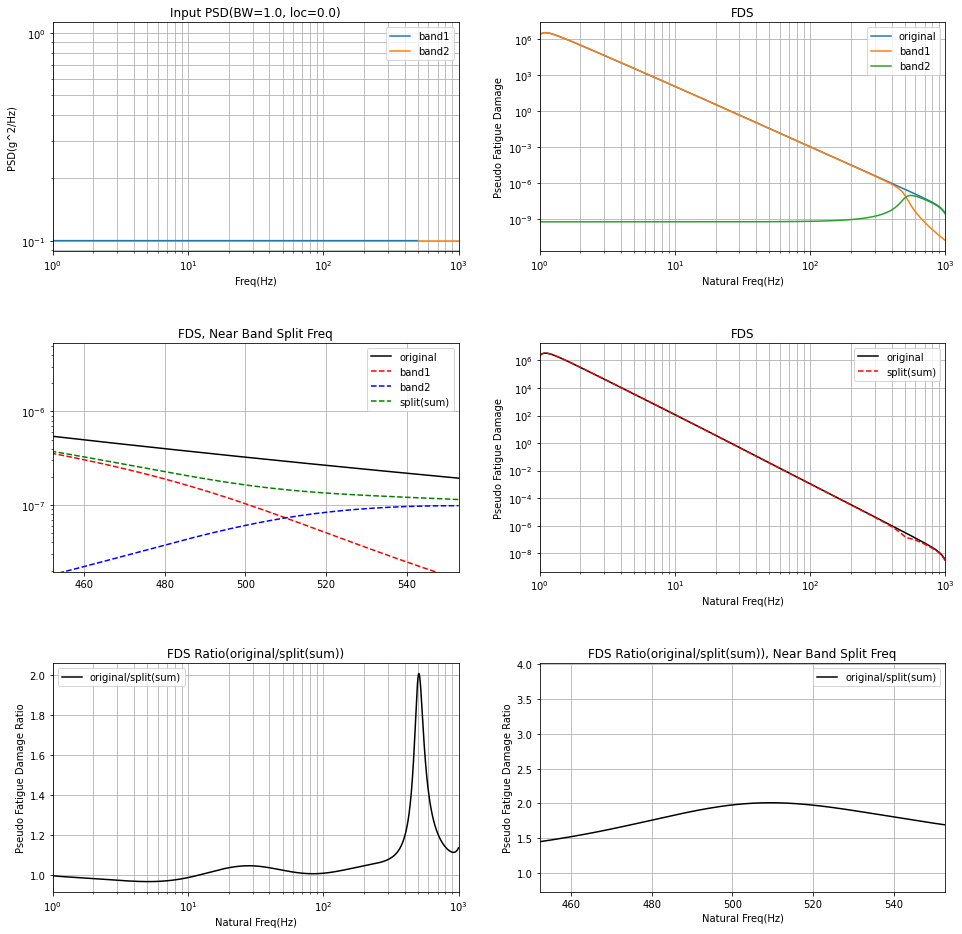

In [4]:
zeta = 0.1;
fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,zeta,4,1,0;
blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

상기 결과를 보면 5Hz에서는 Split 결과가 더 크고, 13 Hz에서는 Original 결과가 더 큼

### Case1) 5 Hz

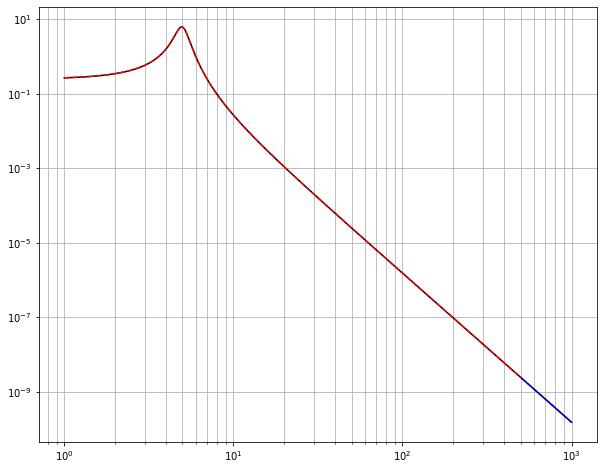

In [5]:
fn1 = 5;
# Generate Input PSD
freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000); 
for i in range(5000):
    psd_spec[i]= blwn(freq_spec[i],fmin,fmax,bwp,loc);
# Band Split
fi,pi = freq_spec,psd_spec;
dfi,dpi = band_split(fi,pi,2);

K = 1;
rpsd1 = pi*HH(fi,fn1,zeta)*K;
rpsd2 = dpi[0]*HH(dfi[0],fn1,zeta)*K;
rpsd3 = dpi[1]*HH(dfi[1],fn1,zeta)*K;

plt.figure(figsize=(10,8));
plt.plot(fi,rpsd1,'k-'); plt.plot(dfi[0],rpsd2,'r--'); plt.plot(dfi[1],rpsd3,'b--');
plt.xscale('log'); plt.yscale('log'); plt.grid(which='both');

In [6]:
D1 = D_dirlik(fi,rpsd1,m=4,T=1,C=1);
D2 = D_dirlik(dfi[0],rpsd2,m=4,T=1,C=1);
D3 = D_dirlik(dfi[1],rpsd3,m=4,T=1,C=1);
print("D1 = %.2f, D2 = %.2f, D3 = %.2f"%(D1,D2,D3));

D1 = 3512.15, D2 = 3633.32, D3 = 0.00


Band 1의 Damage가 original Damage보다 큼

In [7]:
def D_dirlik(freq,psd,m,T,C):
    M0 = M(freq,psd,0);  M1 = M(freq,psd,1);  M2 = M(freq,psd,2);  M4 = M(freq,psd,4);
    E0 = np.sqrt(M2/M0);
    Ep = np.sqrt(M4/M2);
    r = E0/Ep;    
    Xm = (M1/M0)*np.sqrt(M2/M4);
    Z = 1/np.sqrt(M0);
    D1 = 2*(Xm-r**2)/(1+r**2);
    R = (r-Xm-D1**2)/(1-r-D1+D1**2);
    D2 = (1-r-D1+D1**2)/(1-R);
    D3 = 1 - D1 - D2;
    Q = 1.25*(r-D3-D2*R)/D1
    def f(sa):
        A1 = D1/(np.sqrt(M0)*Q);
        A2 = D2*Z*sa/(np.sqrt(M0)*R**2);
        A3 = D3*Z*sa/np.sqrt(M0);
        a1 = -Z*sa/Q
        a2 = -(Z**2)*(sa**2)/(2*R**2);
        a3 = -(Z**2)*(sa**2)/2;
        return A1*np.exp(a1) + A2*np.exp(a2) + A3*np.exp(a3);
    def z(m):
        mm = np.linspace(3,12,10);
        zz = np.array([8.652,8.822,8.982,9.133,9.277,9.415,9.546,9.673,9.796,9.915]);
        return np.interp(m,mm,zz);
    LB = 0; UB = z(m)*np.sqrt(M0);
    s = np.linspace(LB,UB,10000);
    samfsa = (s**m)*f(s);
    intsamfsa = np.trapz(samfsa,s);
    return s,samfsa, Ep;

fsa1 = 136.58, fsa2 = 195.78 fsa3 = 0.00
Ep1 = 25.71, Ep2 = 18.56 Ep3 = 708.87
D1 = 3512.15, D2 = 3633.32, D3 = 0.00


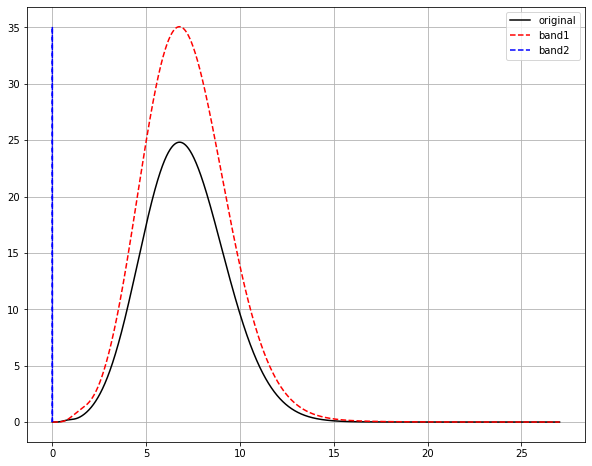

In [8]:
s1,fsa1,Ep1 = D_dirlik(fi,rpsd1,m=4,T=1,C=1);
s2,fsa2,Ep2 = D_dirlik(dfi[0],rpsd2,m=4,T=1,C=1);
s3,fsa3,Ep3 = D_dirlik(dfi[1],rpsd3,m=4,T=1,C=1);
plt.figure(figsize=(10,8)); plt.plot(s1,fsa1,'k-',label='original');
plt.plot(s2,fsa2,'r--',label='band1'); 
plt.plot(s3,fsa2,'b--',label='band2');
plt.legend(); plt.grid();

intsamfsa1 = np.trapz(fsa1,s1); intsamfsa2 = np.trapz(fsa2,s2); intsamfsa3 = np.trapz(fsa3,s3);
print("fsa1 = %.2f, fsa2 = %.2f fsa3 = %.2f"%(intsamfsa1,intsamfsa2,intsamfsa3));
print("Ep1 = %.2f, Ep2 = %.2f Ep3 = %.2f"%(Ep1,Ep2,Ep3));
print("D1 = %.2f, D2 = %.2f, D3 = %.2f"%(D1,D2,D3));

### Case2) 13 Hz

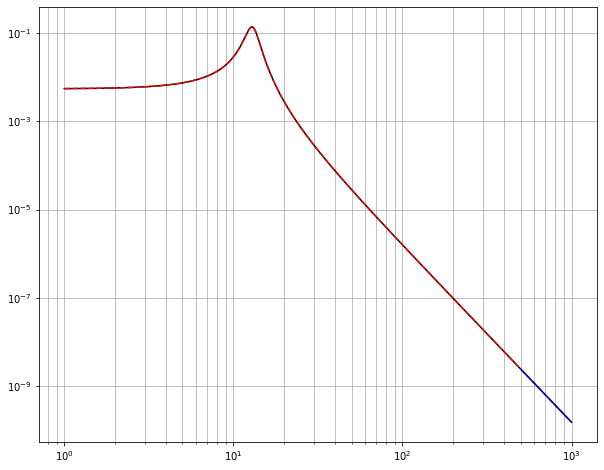

In [9]:
fn1 = 13;
# Generate Input PSD
freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000); 
for i in range(5000):
    psd_spec[i]= blwn(freq_spec[i],fmin,fmax,bwp,loc);
# Band Split
fi,pi = freq_spec,psd_spec;
dfi,dpi = band_split(fi,pi,2);

K = 1;
rpsd1 = pi*HH(fi,fn1,zeta)*K;
rpsd2 = dpi[0]*HH(dfi[0],fn1,zeta)*K;
rpsd3 = dpi[1]*HH(dfi[1],fn1,zeta)*K;

plt.figure(figsize=(10,8));
plt.plot(fi,rpsd1,'k-'); plt.plot(dfi[0],rpsd2,'r--'); plt.plot(dfi[1],rpsd3,'b--');
plt.xscale('log'); plt.yscale('log'); plt.grid(which='both');

In [10]:
%run functions.ipynb

In [11]:
D1 = D_dirlik(fi,rpsd1,m=4,T=1,C=1);
D2 = D_dirlik(dfi[0],rpsd2,m=4,T=1,C=1);
D3 = D_dirlik(dfi[1],rpsd3,m=4,T=1,C=1);
print("D1 = %.2f, D2 = %.2f, D3 = %.2f"%(D1,D2,D3));

D1 = 31.43, D2 = 31.27, D3 = 0.00


original Damage가 Band 1의 Damage보다 큼

In [12]:
def D_dirlik(freq,psd,m,T,C):
    M0 = M(freq,psd,0);  M1 = M(freq,psd,1);  M2 = M(freq,psd,2);  M4 = M(freq,psd,4);
    E0 = np.sqrt(M2/M0);
    Ep = np.sqrt(M4/M2);
    r = E0/Ep;    
    Xm = (M1/M0)*np.sqrt(M2/M4);
    Z = 1/np.sqrt(M0);
    D1 = 2*(Xm-r**2)/(1+r**2);
    R = (r-Xm-D1**2)/(1-r-D1+D1**2);
    D2 = (1-r-D1+D1**2)/(1-R);
    D3 = 1 - D1 - D2;
    Q = 1.25*(r-D3-D2*R)/D1
    def f(sa):
        A1 = D1/(np.sqrt(M0)*Q);
        A2 = D2*Z*sa/(np.sqrt(M0)*R**2);
        A3 = D3*Z*sa/np.sqrt(M0);
        a1 = -Z*sa/Q
        a2 = -(Z**2)*(sa**2)/(2*R**2);
        a3 = -(Z**2)*(sa**2)/2;
        return A1*np.exp(a1) + A2*np.exp(a2) + A3*np.exp(a3);
    def z(m):
        mm = np.linspace(3,12,10);
        zz = np.array([8.652,8.822,8.982,9.133,9.277,9.415,9.546,9.673,9.796,9.915]);
        return np.interp(m,mm,zz);
    LB = 0; UB = z(m)*np.sqrt(M0);
    s = np.linspace(LB,UB,10000);
    samfsa = (s**m)*f(s);
    intsamfsa = np.trapz(samfsa,s);
    return s,samfsa, Ep;

fsa1 = 0.74, fsa2 = 0.99 fsa3 = 0.00
Ep1 = 42.66, Ep2 = 31.56 Ep3 = 708.84
D1 = 31.43, D2 = 31.27, D3 = 0.00


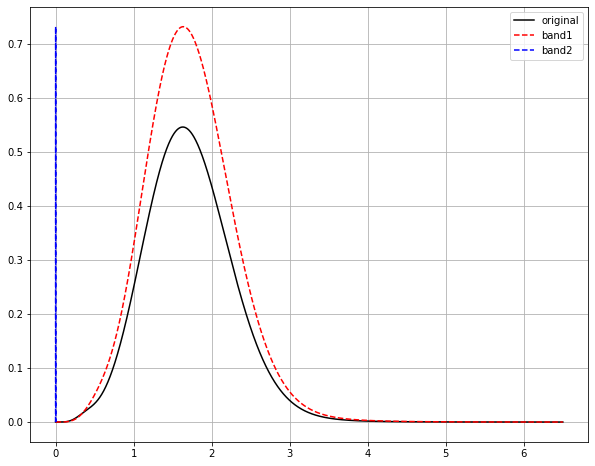

In [13]:
s1,fsa1,Ep1 = D_dirlik(fi,rpsd1,m=4,T=1,C=1);
s2,fsa2,Ep2 = D_dirlik(dfi[0],rpsd2,m=4,T=1,C=1);
s3,fsa3,Ep3 = D_dirlik(dfi[1],rpsd3,m=4,T=1,C=1);
plt.figure(figsize=(10,8)); plt.plot(s1,fsa1,'k-',label='original');
plt.plot(s2,fsa2,'r--',label='band1'); 
plt.plot(s3,fsa2,'b--',label='band2');
plt.legend(); plt.grid();

intsamfsa1 = np.trapz(fsa1,s1); intsamfsa2 = np.trapz(fsa2,s2); intsamfsa3 = np.trapz(fsa3,s3);
print("fsa1 = %.2f, fsa2 = %.2f fsa3 = %.2f"%(intsamfsa1,intsamfsa2,intsamfsa3));
print("Ep1 = %.2f, Ep2 = %.2f Ep3 = %.2f"%(Ep1,Ep2,Ep3));
print("D1 = %.2f, D2 = %.2f, D3 = %.2f"%(D1,D2,D3));

저주파 구간에서는 Band Split 한게 오히려 보수적일 수 있다??

In [91]:
s1,fsa1,Ep1 = D_dirlik(fi,rpsd1,m=8,T=1,C=1);
s2,fsa2,Ep2 = D_dirlik(fi[:n],rpsd1[:n],m=8,T=1,C=1);

In [92]:
intsamfsa1 = np.trapz(fsa1,s1); intsamfsa2 = np.trapz(fsa2,s2);
D1 = intsamfsa1*Ep1; D2 = intsamfsa2*Ep2;
print("fsa1 = %.2f, fsa2 = %.2f"%(intsamfsa1,intsamfsa2));
print("Ep1 = %.2f, Ep2 = %.2f"%(Ep1,Ep2));
print("D1 = %.2f, D2 = %.2f"%(D1,D2));

fsa1 = 10.97, fsa2 = 10.97
Ep1 = 42.66, Ep2 = 42.66
D1 = 468.01, D2 = 468.01


In [93]:
p = np.linspace(1,100,100)/100; r = np.zeros(len(p));
for i in range(len(p)):
    n = int(5000*p[i]);
    s1,fsa1,Ep1 = D_dirlik(fi,rpsd1,m=4,T=1,C=1);
    s2,fsa2,Ep2 = D_dirlik(fi[:n],rpsd1[:n],m=4,T=1,C=1);
    intsamfsa1 = np.trapz(fsa1,s1); intsamfsa2 = np.trapz(fsa2,s2);
    D1 = intsamfsa1*Ep1; D2 = intsamfsa2*Ep2;
    r[i] = D2/D1;

In [94]:
max(r)

1.0045185874795879

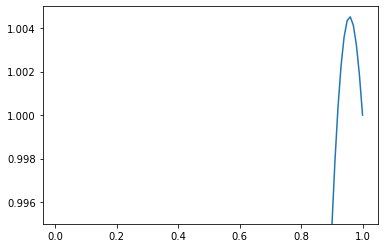

In [95]:
plt.plot(p,r); plt.ylim(0.995,1.005);

In [81]:
m = 4;
p = np.linspace(1,100,100)/100; Ep = np.zeros(len(p)); intsamfsa = np.zeros(len(p)); ff  = np.zeros(len(p));
for i in range(len(p)):
    n = int(5000*p[i]); 
    M0 = M(fi[:n],rpsd1[:n],0); M1 = M(fi[:n],rpsd1[:n],1); M2 = M(fi[:n],rpsd1[:n],2); M4 = M(fi[:n],rpsd1[:n],4);
    ff[i] = max(fi[:n]);
    E0 = np.sqrt(M2/M0);
    Ep[i] = np.sqrt(M4/M2);    
    r = E0/Ep[i];    
    Xm = (M1/M0)*np.sqrt(M2/M4);
    Z = 1/np.sqrt(M0);
    D1 = 2*(Xm-r**2)/(1+r**2);
    R = (r-Xm-D1**2)/(1-r-D1+D1**2);
    D2 = (1-r-D1+D1**2)/(1-R);
    D3 = 1 - D1 - D2;
    Q = 1.25*(r-D3-D2*R)/D1
    def f(sa):
        A1 = D1/(np.sqrt(M0)*Q);
        A2 = D2*Z*sa/(np.sqrt(M0)*R**2);
        A3 = D3*Z*sa/np.sqrt(M0);
        a1 = -Z*sa/Q
        a2 = -(Z**2)*(sa**2)/(2*R**2);
        a3 = -(Z**2)*(sa**2)/2;
        return A1*np.exp(a1) + A2*np.exp(a2) + A3*np.exp(a3);
    def z(m):
        mm = np.linspace(3,12,10);
        zz = np.array([8.652,8.822,8.982,9.133,9.277,9.415,9.546,9.673,9.796,9.915]);
        return np.interp(m,mm,zz);
    LB = 0; UB = z(m)*np.sqrt(M0);
    s = np.linspace(LB,UB,10000);
    samfsa = (s**m)*f(s);
    intsamfsa[i] = np.trapz(samfsa,s);

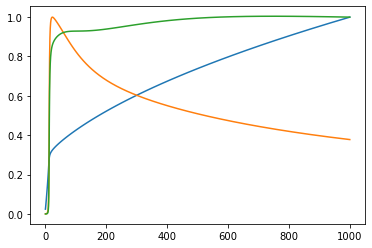

In [86]:
plt.plot(ff,Ep/max(Ep)); plt.plot(ff,intsamfsa/max(intsamfsa)); 
plt.plot(ff,Ep*intsamfsa/(Ep[-1]*intsamfsa[-1]));
#plt.ylim(0.995,1.005); plt.grid();